## Unsupervised Learning


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df =  pd.read_csv("NCI60.csv")

In [3]:
df.head(10)

,Unnamed: 0,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,RENAL
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,BREAST
5,V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.770000,...,0.000000,-0.740000,-2.095000,-1.390020,-0.400000,0.699990,0.290000,0.550000,0.000000,CNS
6,V7,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-0.290000,...,-0.220000,-0.030000,-0.495000,0.929980,0.470000,0.129990,-0.300000,0.570000,0.000000,CNS
7,V8,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-0.310000,...,-0.170000,-0.420000,-0.395000,-0.570020,-0.090000,-0.700010,-0.540000,-0.450000,-2.090000,BREAST
8,V9,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-0.280000,...,0.560000,0.410000,0.705000,-0.200019,-0.330000,-0.600010,0.830000,-0.030000,0.650000,NSCLC
9,V10,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,0.580000,...,-0.590000,-0.410000,-0.375000,-1.150020,-0.330000,-1.220010,-0.170000,-0.110000,-1.790000,NSCLC


In [13]:
#input --> feature -> X
X = df.iloc[:,1:6831]
X

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6821,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [7]:
#Scale --> Yeniden Boyutlandır --> Aynı Ölçülere getir
sc = StandardScaler()

In [8]:
X_scaled = sc.fit_transform(X)

In [10]:
X_scaled

array([[ 0.72867057,  1.60722049,  1.32568834, ...,  0.52089301,
        -0.83636534, -1.38467476],
       [ 1.59641782,  1.7535441 ,  0.44168566, ..., -0.8236521 ,
        -0.92542475, -1.43144619],
       [ 2.19028963, -0.01621694, -0.34909222, ...,  0.00870438,
        -0.96095134, -0.09583766],
       ...,
       [ 0.52313039, -0.78801506, -0.30257053, ...,  0.36723642,
         3.38176079,  2.53525983],
       [-0.07065235,  0.22330662, -0.16300549, ..., -0.46507011,
        -0.21343532, -1.2444386 ],
       [ 0.84285956, -0.32227482,  0.09286376, ...,  0.53369773,
        -0.49820333,  0.71218974]])

In [16]:
#principal Compenent Analysis
#Önemli Olan Genler(2 adet) --> PCA
pca = PCA(n_components=2)

In [23]:
pca_result = pca.fit_transform(X_scaled)

In [24]:
print("Eigenvalues")
pca.explained_variance_

Eigenvalues


array([788.13026426, 468.77321239])

In [25]:
print("Variances (percentage)")
pca.explained_variance_ratio_*100

Variances (percentage)


array([11.35894186,  6.7562025 ])

In [26]:
principalDf= pd.DataFrame(data=pca_result,columns=["PC1","PC2"])

In [29]:
principalDf.head(10) 

,PC1,PC2
0,-19.838036,-3.555738
1,-23.089182,-6.442673
2,-27.456127,-2.464631
3,-42.816814,9.769716
4,-55.418567,5.200192
5,-27.177985,-6.781777
6,-31.445914,-3.865753
7,-22.332362,-10.396071
8,-14.289918,-16.109643
9,-29.748150,-23.991707


In [30]:
finalDf = pd.concat([principalDf,df[["labs"]]],axis=1)

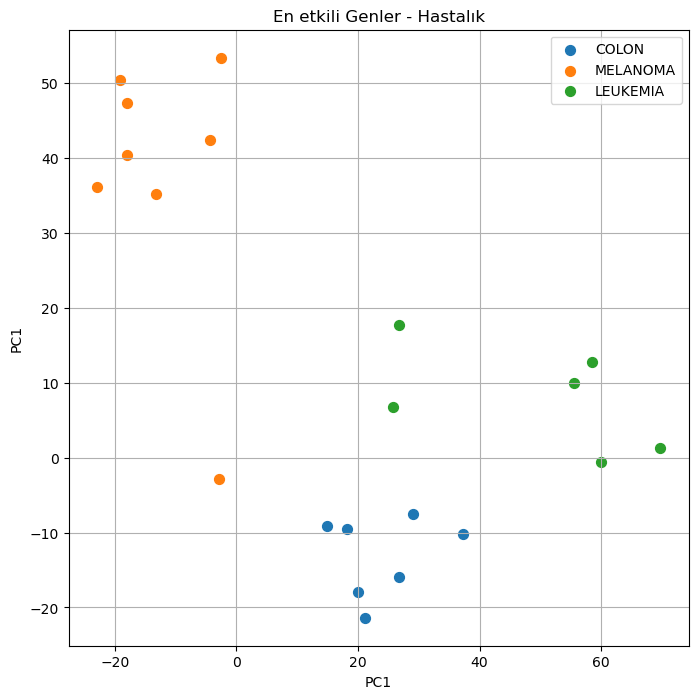

In [35]:
#Plot PCA
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel("PC1")
ax.set_ylabel("PC1")
ax.set_title("En etkili Genler - Hastalık")


targets = ["COLON","MELANOMA","LEUKEMIA"]

for target in targets:
    indexler = finalDf["labs"] == target
    ax.scatter(finalDf.loc[indexler,"PC1"],
              finalDf.loc[indexler,"PC2"], s = 50)
ax.legend(targets, loc="upper right")
ax.grid()